In [ ]:
pip install -q tensorflow tensorflow-datasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
# tfds.disable_progress_bar()

In [ ]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview

tfds.list_builders()

In [ ]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

print(info)

In [ ]:
# Prepare Rock, Paper, Scissors Data
ds_train = tfds.load(name='rock_paper_scissors', split="train")
ds_test = tfds.load(name='rock_paper_scissors', split="test")

In [ ]:
#Show examples
fig = tfds.show_examples(info, ds_train)

In [ ]:
# Additional Data Prep .numpy --> changes to numpy format
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [ ]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [ ]:
#Train a neural network (basic approach)

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)



In [ ]:
# Train a Network (convolutional approach)
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

In [ ]:
model.evaluate(test_images, test_labels)

In [ ]:
# Better Convolutional Network
model = keras.Sequential([
    keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

In [ ]:
model.evaluate(test_images, test_labels)

In [ ]:
pip install -U keras-tuner

In [ ]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)))
    for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
        model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))
    
    model.add(keras.layers.Dense(3, activation='softmax'))
    
    model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
    return model
    
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

In [ ]:
best_model = tuner.get_best_models[0]

In [ ]:
best_model.evaluate(test_images, test_labels)

In [ ]:
best_model.summary()

In [ ]:
tuner.results_summary()

In [ ]:
# Save & Load our Models
# best_model.save('./my_model')
# Separate Cell:
# loaded_model = keras.models.load_model('./my_model')

In [ ]:
loaded_model.evaluate(test_images, test_labels)

(300, 300, 3)

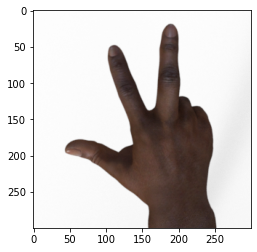

In [24]:
# Plot Image from Numpy Array
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]

image = train_images[0].reshape(300,300)

plt.imshow(rgb_image)
rgb_image.shape